In [164]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile
import warnings


warnings.filterwarnings('ignore')

In [165]:
# Download the data
# This is the link for the data set
# https://www.kaggle.com/datasets/sudhanvahg/gdp-and-productivity-of-indian-cities-2019-2024
!kaggle datasets download -d sudhanvahg/gdp-and-productivity-of-indian-cities-2019-2024

Dataset URL: https://www.kaggle.com/datasets/sudhanvahg/gdp-and-productivity-of-indian-cities-2019-2024
License(s): CC0-1.0
gdp-and-productivity-of-indian-cities-2019-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [166]:
# Jupyter Notebook's path
os.chdir("C:/Users/PC/Desktop") # This must be changed :)

# Unzip the files
with zipfile.ZipFile('./gdp-and-productivity-of-indian-cities-2019-2024.zip', 'r') as zip_ref:
    zip_ref.extractall('./Indian_GDP_Datasets')


print('Changing Directory!')
os.chdir('./Indian_GDP_Datasets')
print('Current Directory: ', os.getcwd())

Changing Directory!
Current Directory:  C:\Users\PC\Desktop\Indian_GDP_Datasets


In [167]:
# Read the two data sets as pandas data frames 
df_economy = pd.read_csv('Economy_Productivity_SD_India.csv')
df_income = pd.read_csv('GDP_Sector_Income_2019_2023_30Cities.csv')

In [168]:
# Display the head of the two data sets
display(df_economy.head())
display(df_income.head())

,City,Year,R&D Expenditure (% of GDP),"Patents per 100,000 Inhabitants",Unemployment Rate (%),Youth Unemployment Rate (%),SME Employment (%),Tourism Sector Employment (%),ICT Sector Employment (%)
0,Ahmedabad,2019,1.06,3.4,5.6,11.8,38.5,5.2,20.7
1,Ahmedabad,2020,1.93,2.1,6.6,10.4,19.5,4.2,6.8
2,Ahmedabad,2021,1.60,6.6,5.8,8.9,16.7,5.1,13.4
3,Ahmedabad,2022,1.40,6.3,6.2,10.7,33.5,7.5,22.6
4,Ahmedabad,2023,0.73,2.9,7.8,10.5,29.4,6.5,23.9


,City,Year,GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%)
0,Ahmedabad,2019,187.2,15.7,32.1,40.9,20.6
1,Ahmedabad,2020,211.5,11.6,37.8,49.3,19.6
2,Ahmedabad,2021,247.9,12.9,31.4,48.5,11.8
3,Ahmedabad,2022,71.8,5.3,36.7,45.6,31.8
4,Ahmedabad,2023,294.7,17.0,29.2,45.6,13.0


In [169]:
# Remove NANs values
def check_for_NAs(df):
    if df.isnull().values.any():
        df = df.dropna()
    return df

print(f"The shape before the NA values of the economy data set is: {df_economy.shape} and the income data set is: {df_income.shape}.")
df_economy_final = check_for_NAs(df_economy)
df_income_final = check_for_NAs(df_income)
print(f"The shape after the NA values of the economy data set is: {df_economy_final.shape} and the income data set is: {df_income_final.shape}.")


The shape before the NA values of the economy data set is: (180, 9) and the income data set is: (150, 7).
The shape after the NA values of the economy data set is: (180, 9) and the income data set is: (150, 7).


### Indian's Economy

In [170]:
df_economy_final.head()

,City,Year,R&D Expenditure (% of GDP),"Patents per 100,000 Inhabitants",Unemployment Rate (%),Youth Unemployment Rate (%),SME Employment (%),Tourism Sector Employment (%),ICT Sector Employment (%)
0,Ahmedabad,2019,1.06,3.4,5.6,11.8,38.5,5.2,20.7
1,Ahmedabad,2020,1.93,2.1,6.6,10.4,19.5,4.2,6.8
2,Ahmedabad,2021,1.60,6.6,5.8,8.9,16.7,5.1,13.4
3,Ahmedabad,2022,1.40,6.3,6.2,10.7,33.5,7.5,22.6
4,Ahmedabad,2023,0.73,2.9,7.8,10.5,29.4,6.5,23.9


In [171]:
df_economy_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             180 non-null    object 
 1   Year                             180 non-null    int64  
 2   R&D Expenditure (% of GDP)       180 non-null    float64
 3   Patents per 100,000 Inhabitants  180 non-null    float64
 4   Unemployment Rate (%)            180 non-null    float64
 5   Youth Unemployment Rate (%)      180 non-null    float64
 6   SME Employment (%)               180 non-null    float64
 7   Tourism Sector Employment (%)    180 non-null    float64
 8   ICT Sector Employment (%)        180 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.8+ KB


In [172]:
df_economy_final.describe()

,Year,R&D Expenditure (% of GDP),"Patents per 100,000 Inhabitants",Unemployment Rate (%),Youth Unemployment Rate (%),SME Employment (%),Tourism Sector Employment (%),ICT Sector Employment (%)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2021.500000,1.208167,4.296667,6.160000,9.813333,27.197222,7.005000,15.628889
std,1.712589,0.440471,1.592893,1.260602,1.106325,7.209200,1.769268,5.963497
min,2019.000000,0.510000,1.500000,4.000000,8.100000,15.100000,4.100000,5.100000
25%,2020.000000,0.827500,2.975000,5.100000,8.800000,20.425000,5.500000,10.050000
50%,2021.500000,1.195000,4.500000,6.200000,9.700000,27.150000,7.000000,16.600000
75%,2023.000000,1.590000,5.525000,7.300000,10.700000,33.425000,8.600000,20.750000
max,2024.000000,1.980000,6.900000,8.000000,12.000000,39.900000,10.000000,24.900000


In [173]:
# 1. What is the average R&D Expenditure (% of GDP) across all cities?
Q1 = df_economy_final.groupby('City').mean()['R&D Expenditure (% of GDP)']

In [174]:
# 2. Which city has the highest Patents per 100,000 Inhabitants in the most recent year?
YearMax =  df_economy_final[df_economy_final['Year'] == df_economy_final['Year'].max()]
Q2 = YearMax.loc[ YearMax['Patents per 100,000 Inhabitants'] == YearMax['Patents per 100,000 Inhabitants'].max() ,'City']
Q2

125    Faridabad
Name: City, dtype: object

<Axes: xlabel='Year', ylabel='Youth Unemployment Rate (%)'>

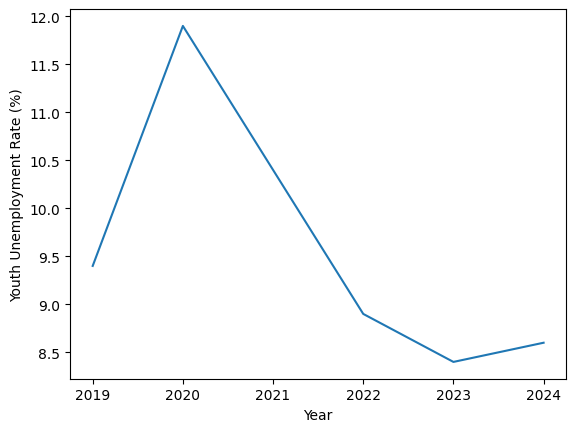

In [175]:
# 3. How does the Youth Unemployment Rate (%) change over time for a specific city?
# Seaborn will be used in order to plot a line
sns.lineplot(data=df_economy_final.loc[df_economy_final['City'] == "Faridabad",:], x="Year", y="Youth Unemployment Rate (%)")

<Axes: xlabel='Year', ylabel='Youth Unemployment Rate (%)'>

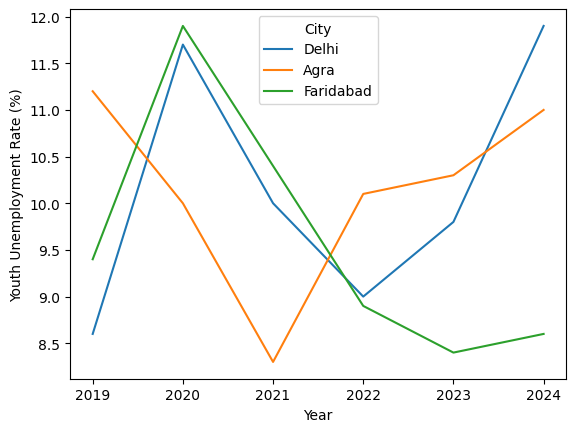

In [176]:
# 4. Is there a trend in the Youth Unemployment Rate (%) across the cities Faridabad, Delhi and Agra over the years?

df_Q4 = df_economy_final[(df_economy_final['City'] == "Faridabad") | (df_economy_final['City'] == "Delhi") | (df_economy_final['City'] == "Agra")]
sns.lineplot(data=df_Q4, x="Year", y="Youth Unemployment Rate (%)", hue = 'City')


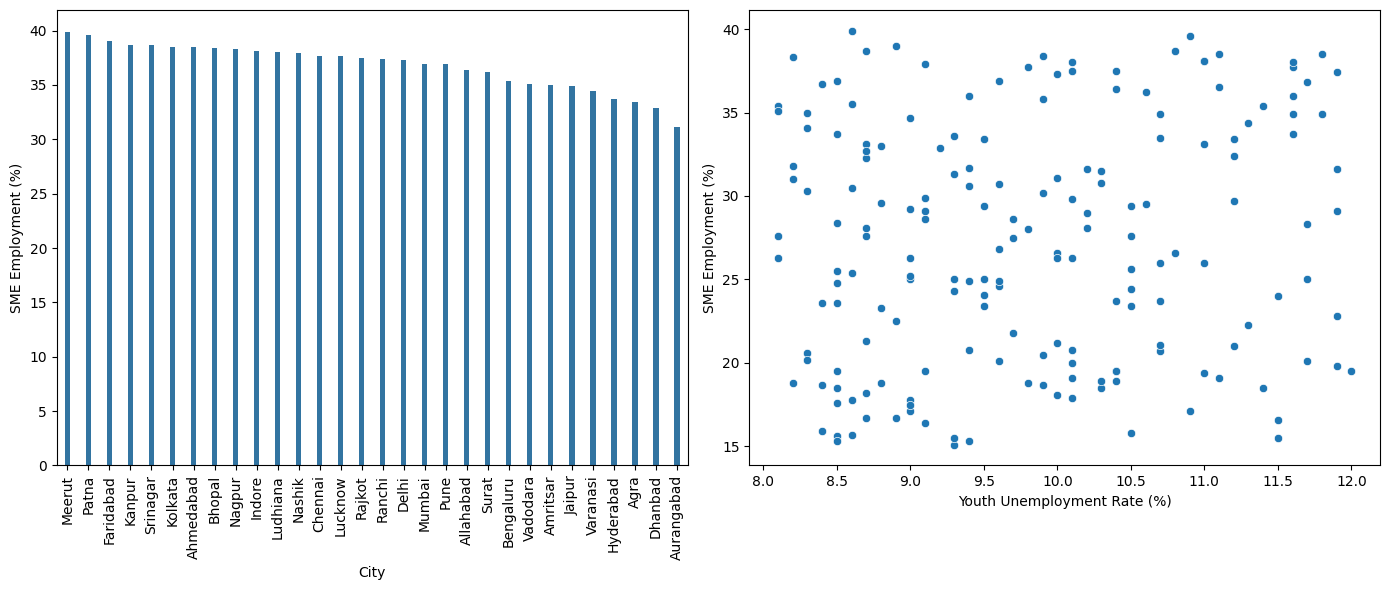

In [177]:
# 5. Which cities have the highest SME Employment (%) and how does this relate to their Unemployment Rate (%)?

df_Q5 = df_economy_final.groupby("City")['SME Employment (%)'].max().sort_values(ascending=False).reset_index()
f, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(data=df_Q5, x = 'City', y = 'SME Employment (%)', gap = 0.5, width = 0.5, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.scatterplot(df_economy_final, x = 'Youth Unemployment Rate (%)', y = 'SME Employment (%)', ax=axes[1])
plt.tight_layout()
plt.show()

In [178]:
# 6. Which city has the highest ICT Sector Employment (%) and how does this compare to its R&D Expenditure (% of GDP)?
df_Q6 = df_economy_final.groupby('City')['ICT Sector Employment (%)'].max().reset_index()
print(f"The city with the highest ICT Sector Employment (%) is {df_Q6.max()['City']} with ICT Sector Employment (%) of {df_Q6.max()['ICT Sector Employment (%)']} %")


df_Q6_2 = df_economy_final.loc[df_economy_final['City'] == df_Q6.max()['City'], :]
print(f"The city {df_Q6.max()['City']} has R&D Expenditure (% of GDP) of {df_Q6_2.max()['R&D Expenditure (% of GDP)']} %")

The city with the highest ICT Sector Employment (%) is Varanasi with ICT Sector Employment (%) of 24.9 %
The city Varanasi has R&D Expenditure (% of GDP) of 1.96 %


In [179]:
# 7. Is there a correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants for each year (2018-2024)?
for year in df_economy_final['Year'].unique():
    df_Q7 = df_economy_final.loc[df_economy_final['Year'] == year, ['R&D Expenditure (% of GDP)', 'Patents per 100,000 Inhabitants']]
    corr_matrix = np.corrcoef(np.array(df_Q7['R&D Expenditure (% of GDP)']), np.array(df_Q7['Patents per 100,000 Inhabitants']))
    print(f" The correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants of year {year} is {round(corr_matrix[np.triu_indices(2)][1], 3)}")

 The correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants of year 2019 is -0.079
 The correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants of year 2020 is -0.356
 The correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants of year 2021 is 0.313
 The correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants of year 2022 is 0.135
 The correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants of year 2023 is 0.109
 The correlation between R&D Expenditure (% of GDP) and Patents per 100,000 Inhabitants of year 2024 is 0.199


In [180]:
# 8. What is the average Youth Unemployment Rate (%) over the years for 5 cities with the largest Patents per 100,000 Inhabitants?

number_of_years = len(df_economy_final['Year'].unique())
df_Q8 = df_economy_final.groupby('City').sum().drop(['Year'], axis = 1).reset_index()
df_Q8['Youth Unemployment Rate (%)'] = (df_Q8['Youth Unemployment Rate (%)']/number_of_years)

df_Q8 = df_Q8[['City', 'Youth Unemployment Rate (%)']].sort_values(by = 'Youth Unemployment Rate (%)', ascending=False).reset_index(drop=True)
top_5 = df_Q8.iloc[0:5,]
cities = np.array(top_5['City'])
youth = np.array(top_5['Youth Unemployment Rate (%)'])
print(f"The cities are: {cities} \nwith Youth Unemployment Rate (%): {youth}")



The cities are: ['Kolkata' 'Ranchi' 'Varanasi' 'Bengaluru' 'Ahmedabad'] 
with Youth Unemployment Rate (%): [10.75       10.61666667 10.51666667 10.31666667 10.28333333]


### Indian's Income

In [181]:
# These are some basic info about the data set related to the income of India
display(df_income_final.head())
display(df_income_final.info())
display(df_income_final.describe())

,City,Year,GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%)
0,Ahmedabad,2019,187.2,15.7,32.1,40.9,20.6
1,Ahmedabad,2020,211.5,11.6,37.8,49.3,19.6
2,Ahmedabad,2021,247.9,12.9,31.4,48.5,11.8
3,Ahmedabad,2022,71.8,5.3,36.7,45.6,31.8
4,Ahmedabad,2023,294.7,17.0,29.2,45.6,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                150 non-null    object 
 1   Year                150 non-null    int64  
 2   GDP (in billion $)  150 non-null    float64
 3   Agriculture (%)     150 non-null    float64
 4   Industry (%)        150 non-null    float64
 5   Services (%)        150 non-null    float64
 6   Technology (%)      150 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.3+ KB


None

,Year,GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%)
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2021.000000,166.061333,12.416000,29.382667,40.324000,22.996667
std,1.418951,71.577184,4.137796,5.944415,5.940202,7.591751
min,2019.000000,50.700000,5.200000,20.100000,30.300000,10.100000
25%,2020.000000,108.850000,9.200000,24.075000,35.225000,16.125000
50%,2021.000000,150.800000,11.950000,29.200000,40.800000,22.650000
75%,2022.000000,223.400000,15.500000,33.825000,45.000000,30.150000
max,2023.000000,299.500000,19.900000,39.800000,49.900000,35.000000


In [182]:
# 1. What is the average GDP of all cities in the most recent year?
df_income_final.groupby('City').mean().reset_index()[['City', 'GDP (in billion $)']]

,City,GDP (in billion $)
0,Ahmedabad,202.62
1,Aizawl,172.28
2,Amaravati,140.20
3,Amritsar,123.84
4,Bengaluru,177.62
5,Bhopal,197.42
6,Brajrajnagar,195.36
7,Chandigarh,149.16
8,Chennai,203.62
9,Coimbatore,171.24


In [195]:
# 2. For the year 2020, which cities their GDP in billion $ was under 200?
df_income_final.loc[(df_income_final['Year'] == 2020) & (df_income_final['GDP (in billion $)'] < 200),]['City'].reset_index(drop=True)

0              Bengaluru
1                 Mumbai
2                  Delhi
3              Hyderabad
4                   Pune
5                 Jaipur
6                Lucknow
7               Gurugram
8             Chandigarh
9             Coimbatore
10         Visakhapatnam
11    Thiruvananthapuram
12             Ernakulam
13              Amritsar
14              Shillong
15               Talcher
16              Guwahati
17                Aizawl
18             Amaravati
19          Brajrajnagar
20                 Kochi
21           Gandhinagar
22                Indore
23              Vadodara
Name: City, dtype: object

In [184]:
# Question 3
# First find the top 5 countries with the highest average Technology (%) 
# Then for these countries find the average GDP 
# and in which year these countries had the maximum GDP

df = df_income_final.groupby('City').mean().sort_values(by = 'Technology (%)', ascending=False).reset_index().iloc[0:5,].drop(['Year'], axis = 1)[['City','GDP (in billion $)']]
df_2 = df_income_final.groupby('City').max().reset_index()
df_2.loc[df_2['City'].isin(df['City']), ['Year', 'City', 'GDP (in billion $)']].rename(columns={'GDP (in billion $)': 'MAX GDP (in billion $)'}).reset_index(drop=True)

,Year,City,MAX GDP (in billion $)
0,2023,Aizawl,299.5
1,2023,Chandigarh,287.3
2,2023,Guwahati,280.6
3,2023,Kochi,174.4
4,2023,Patna,224.9


In [185]:
# Question 4
# Now we will check more about the country of India 
# for each year find the average of the Agriculture (%)	Industry (%)	Services (%)	Technology (%) and check if there is a correlation
df_income_final.drop(['City'], axis = 1).groupby('Year').mean().corr()

,GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%)
GDP (in billion $),1.000000,0.316613,0.778368,0.631690,-0.082265
Agriculture (%),0.316613,1.000000,0.351658,-0.495705,-0.530542
Industry (%),0.778368,0.351658,1.000000,0.263078,-0.191788
Services (%),0.631690,-0.495705,0.263078,1.000000,0.430673
Technology (%),-0.082265,-0.530542,-0.191788,0.430673,1.000000


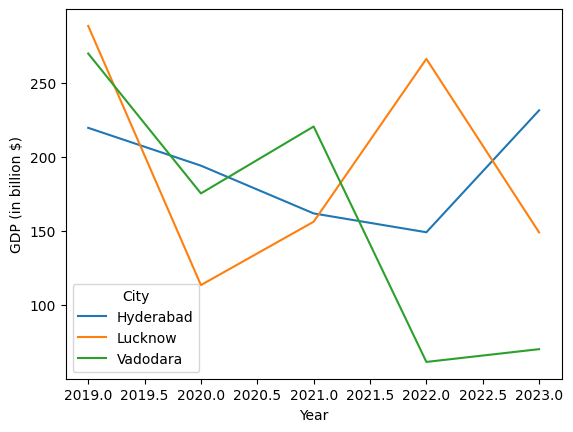

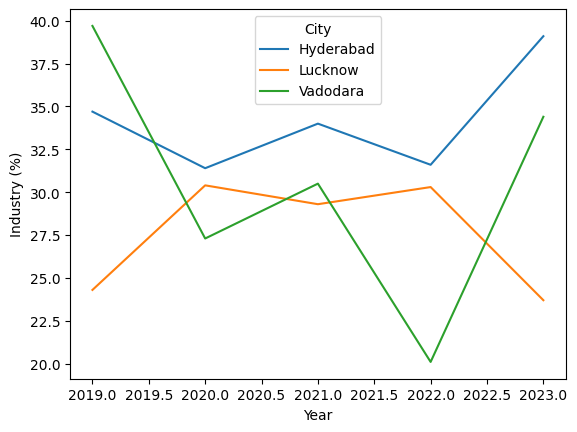

In [186]:
# Question 5 
# Choose three random cities (use a certain seed for reproducability purposes) 
# Are there and correlation between those three countries in terms of GDP (in billion $) and Industry (%) over the years? 

np.random.seed(10)
rows = np.random.randint(0, len(df_income_final['City'].unique()), size=3)

cities = df_income_final['City'].unique()[rows]
arr_all_cities = np.array(df_income_final['City'])
index = np.in1d(arr_all_cities, cities)


df_5 = df_income_final.loc[index, ['Year', 'City' , 'GDP (in billion $)', 'Industry (%)']]
sns.lineplot(data=df_5, x="Year", y="GDP (in billion $)", hue = 'City')
plt.show()
sns.lineplot(data=df_5, x="Year", y="Industry (%)", hue = 'City')
plt.show()

### Now it's time to merge the two data sets and play around with the Data answering couple of questions :)

In [187]:
# The data sets are merged using the inner 
print(f"The shape of the economy data set is: {df_economy_final.shape} and the income data set is: {df_economy_final.shape}.")

final_df = pd.merge(df_economy_final, df_income_final, on=['City', 'Year'], how = 'inner')
print(f"The final shape of the data set is: {final_df.shape}.")
display(final_df.head())

The shape of the economy data set is: (180, 9) and the income data set is: (180, 9).
The final shape of the data set is: (75, 14).


,City,Year,R&D Expenditure (% of GDP),"Patents per 100,000 Inhabitants",Unemployment Rate (%),Youth Unemployment Rate (%),SME Employment (%),Tourism Sector Employment (%),ICT Sector Employment (%),GDP (in billion $),Agriculture (%),Industry (%),Services (%),Technology (%)
0,Ahmedabad,2019,1.06,3.4,5.6,11.8,38.5,5.2,20.7,187.2,15.7,32.1,40.9,20.6
1,Ahmedabad,2020,1.93,2.1,6.6,10.4,19.5,4.2,6.8,211.5,11.6,37.8,49.3,19.6
2,Ahmedabad,2021,1.60,6.6,5.8,8.9,16.7,5.1,13.4,247.9,12.9,31.4,48.5,11.8
3,Ahmedabad,2022,1.40,6.3,6.2,10.7,33.5,7.5,22.6,71.8,5.3,36.7,45.6,31.8
4,Ahmedabad,2023,0.73,2.9,7.8,10.5,29.4,6.5,23.9,294.7,17.0,29.2,45.6,13.0


In [188]:
# 1. Find the top 5 cities with the highest average R&D Expenditure (% of GDP) and the lowest average with the Technology (%)? Are there any common countries? 

# The highest average R&D Expenditure (% of GDP)
high_RD = final_df.groupby('City').mean().reset_index()
high_RD = high_RD[['City', 'R&D Expenditure (% of GDP)']]
high_RD = high_RD.sort_values(by = 'R&D Expenditure (% of GDP)', ascending=False)
high_RD = high_RD.iloc[0:5,:]
high_RD = high_RD.reset_index(drop=True)

# The lowest average Technology (%)
high_technology = final_df.groupby('City').mean().reset_index()
high_technology = high_technology[['City', 'Technology (%)']]
high_technology = high_technology.sort_values(by = 'Technology (%)', ascending=True)
high_technology = high_technology.iloc[0:5,:]
high_technology = high_technology.reset_index(drop=True)

for city in np.array(high_technology['City']):
    if city in np.array(high_RD['City']):
        print(f"The city {city} has low Technology % and high R and D %")



The city Ahmedabad has low Technology % and high R and D %
The city Bhopal has low Technology % and high R and D %


In [189]:
# 2. How many cities have an unemployment rate less than 6% for all years?
for city in final_df['City'].unique():
    unemployment_rate = np.array(final_df.loc[final_df['City'] == city, 'Unemployment Rate (%)'])
    check = [True if x<6 else False for x in unemployment_rate]
    if False not in check:
        print('The city that has an unemployment rate less than 6% for all years is: ', city)
    


The city that has an unemployment rate less than 6% for all years is:  Vadodara


In [190]:
# 3. List and count all cities where the tourism sector employment is greater than 6.5% and the Services (%) is above 41%. (Take the average for each city)


df = final_df.groupby('City').mean().reset_index()
df = df[['City', 'Tourism Sector Employment (%)', 'Services (%)']]
df = df.loc[(df['Tourism Sector Employment (%)'] > 6.5) & (df['Services (%)'] > 41), :]

counts = df.City.count()
delimiter = ', '
name = delimiter.join(np.array(df.City)) 
print(f"The number of cities are: {counts} and the cities are: {name}")



The number of cities are: 4 and the cities are: Amritsar, Hyderabad, Kolkata, Patna


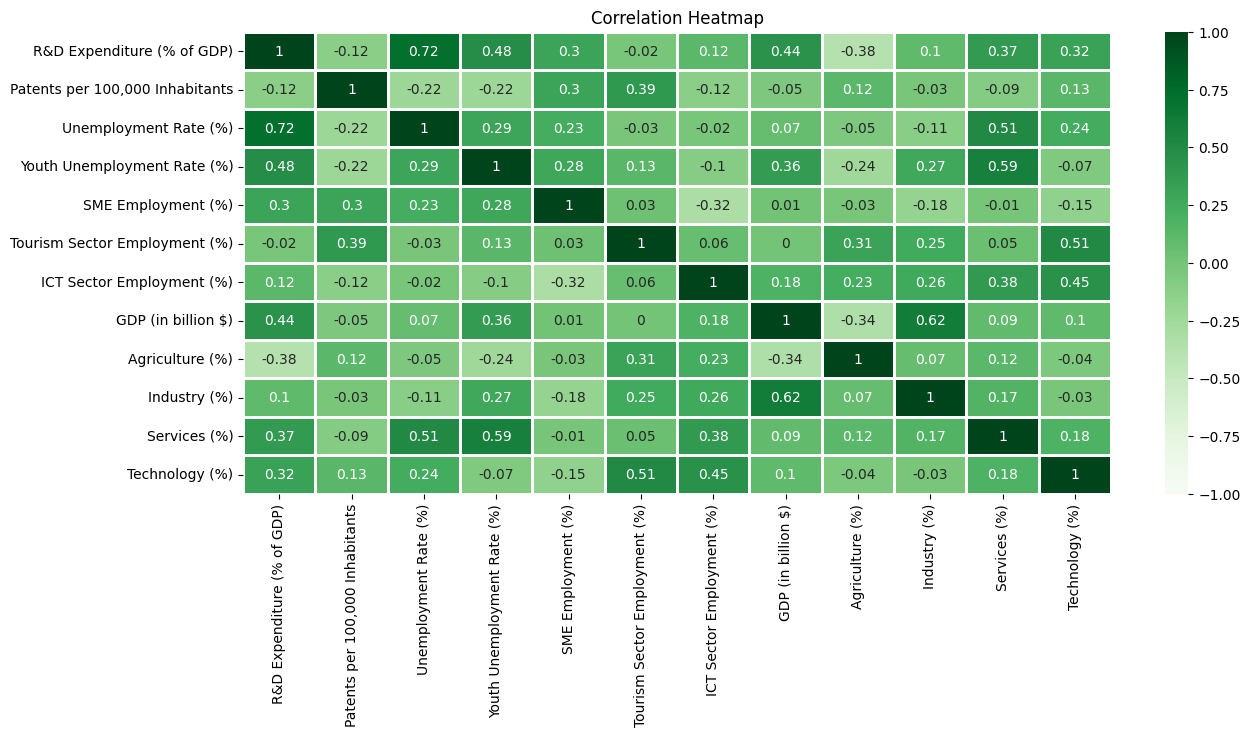

In [191]:
# 4. Calculate the average of each variable and then calculate the correlation. Finally find the appropriate plot to visualize the correlations

ave_values = final_df.groupby('City').mean().drop(['Year'], axis = 1)
correlation_values = ave_values.corr().apply(lambda x: round(x,2))

# Visualize the correlations
f, axes = plt.subplots(figsize=(14, 6))
sns.heatmap(correlation_values, annot=True, vmax=1, vmin=-1, linecolor='white', linewidth=1, cmap="Greens")
axes.set_title('Correlation Heatmap')
plt.show()

### Final part of our analysis

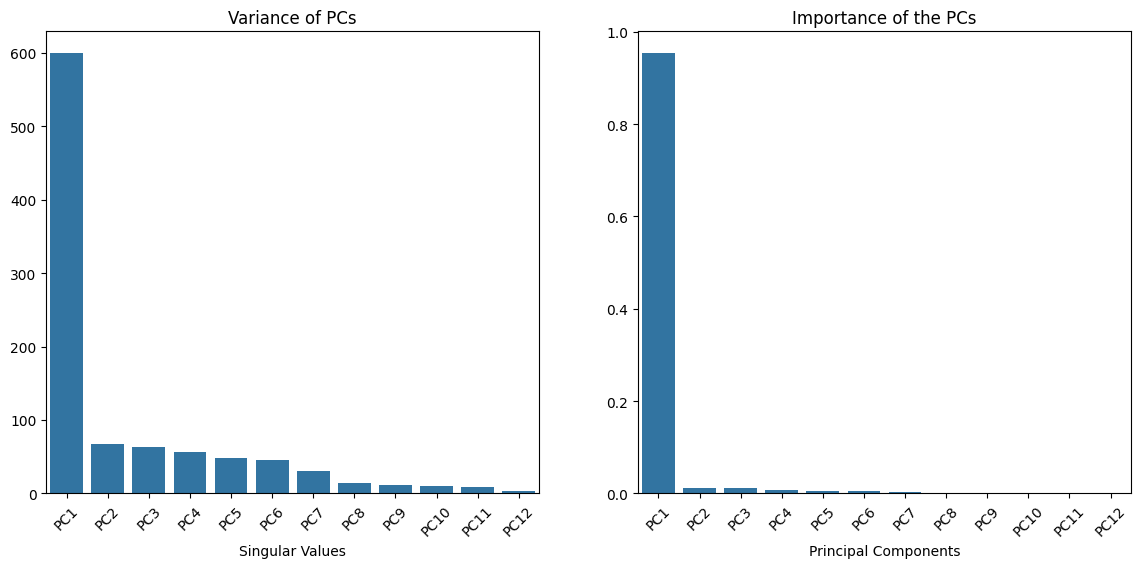

In [192]:
'''
5. Now it's time to perform PCA in order to create a 2D scatterplot. The goal is to identify, in case there are, any clusters.
Therefore, as a final step of the analysis, the algorithm k-means will be performed using different k (indicating the munber of clusters) and 
the optimal one will be determined using the silhouette score. For more, check out the Scikit-learn!
'''

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# We start with PCA 
pca_df = final_df.drop(['Year', 'City'], axis = 1)
pca = PCA(n_components=pca_df.shape[1])
pca_df = pca.fit_transform(pca_df)

columns_pca = np.array(['PC'+str(i+1) for i in range(pca_df.shape[1])])

f, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x =columns_pca,  y=np.sort(pca.explained_variance_ratio_)[::-1], ax=axes[1])
axes[1].set_xticklabels(labels = columns_pca, rotation=45)
axes[1].set_title('Importance of the PCs')
axes[1].set_xlabel('Principal Components')

sns.barplot(data=(pca.singular_values_), ax=axes[0])
axes[0].set_xticklabels(labels = columns_pca, rotation=45)
axes[0].set_title('Variance of PCs')
axes[0].set_xlabel('Singular Values')
plt.show()

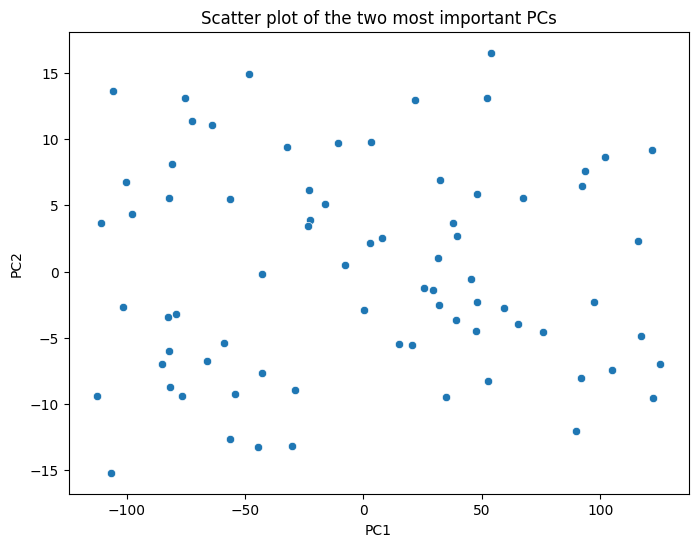

In [193]:
# We are going to keep the first two Principal Components
# columns_pca = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'] this is from previous cell
pca_df = pd.DataFrame(pca_df, columns= columns_pca)
pca_df = pca_df.loc[:, ['PC1', 'PC2']]

f, axes = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=pca_df, x = 'PC1', y = 'PC2')
axes.set_title('Scatter plot of the two most important PCs')
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
plt.show()

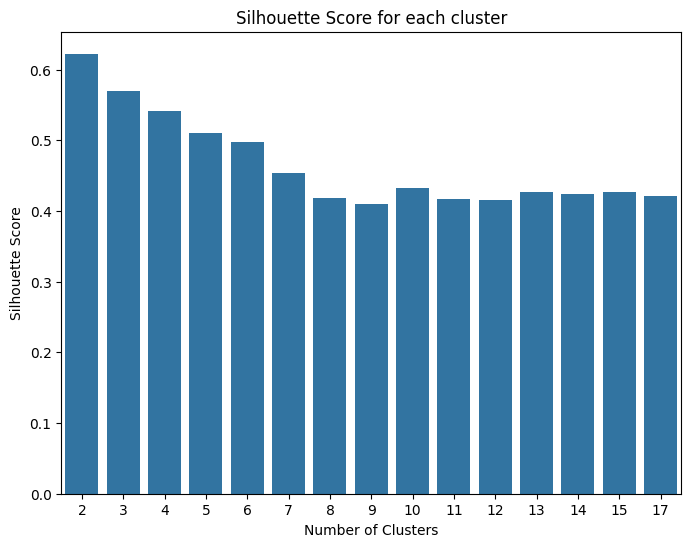

In [194]:
# Now that we are done with PCA, we continue with K-Means algorithm using the the data set with the two Principal Components
# in order to be able to visualize the different clusters. Finally, for each k we calculate the silhouette score and then 
# our goal is to find the best that maximizes the silhouette score

number_clusters = np.linspace(2,17, num = 15, dtype=int)
all_silhouette_score = []
for clusters in number_clusters:
    kmeans = KMeans(n_clusters=clusters, random_state=1)
    score = silhouette_score(pca_df, kmeans.fit_predict(pca_df))
    all_silhouette_score.append(score)

f, axes = plt.subplots(figsize=(8, 6))
sns.barplot(x = number_clusters, y=all_silhouette_score)
axes.set_title('Silhouette Score for each cluster')
axes.set_xlabel('Number of Clusters')
axes.set_ylabel('Silhouette Score')
plt.show()

